In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

import pylab as plb
import numpy as np
import seaborn as sns; sns.set()
sns.set(font_scale=1.5)
%matplotlib inline





# Sources:
 * [CTR prediction for contextual advertising](http://chbrown.github.io/kdd-2013-usb/workshops/ADKDD/doc/wks_submission_4.pdf)

## One main difference in usual click-through rate prediction data we see that it is usually binary and the records are unique by session id. The data I have on hand is actually a summation of all the session id values by date. This is why we don't take a logistic regression approach but a linear regression approach to work with this particular data set. 

In [2]:
df = pd.read_excel('Dummy Dataset.xlsx', sheet_name ='Final Data')
df.head()

,Date,Channel,Spend,Clicks,Impressions,Product Views,Adds to Cart,Purchases,Revenue
0,2017-01-01,Search,2475.0,1303,59733,191,77,5,3530.868624
1,2017-01-02,Search,2475.0,1306,60991,207,77,5,3629.301230
2,2017-01-03,Search,2475.0,1281,60455,216,80,6,4061.252371
3,2017-01-04,Search,2475.0,1250,59884,216,81,6,3971.088990
4,2017-01-05,Search,2475.0,1233,60140,222,81,6,4264.898166


# Lets work our way into this by preprocessing the data first 

# And lets create some date related variables that my help with EDA and creating predictors


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.weekday

# We notice that the channels are equivalent in number of records

In [4]:
df['Channel'].value_counts()

Search     730
Social     730
Display    730
Name: Channel, dtype: int64

# Create some metrics that may be useful for analysis

In [5]:
# Click through rate 

# Note that any divisor that may have the value 0 may result in inf values for any of the newly created variables
# since x/0 -> inf

# so what we can do is add 1 to the clicks, adding 1 to the clicks won't necessary
# mess up the analysis since when observing the distribution of clicks there arent many close to 0 values
# and that the mean number of clicks is 1520
df['Clicks'] = df['Clicks']+1
df['CTR'] = df['Clicks']/df['Impressions']

# cost per click

df['CPC'] = df['Spend']/df['Clicks']

# cost per product view
df['Product Views'] = df['Product Views']+1
df['CPPV'] = df['Spend']/df['Product Views']

# cost per adds to cart
df['Adds to Cart'] = df['Adds to Cart']+1
df['CPPAC'] = df['Spend']/df['Adds to Cart']

# cost per purchase
df['CPP'] = df['Spend']/df['Purchases']

# return on add spend
df['ROAS'] = df['Revenue']/df['Spend']


# Conversion rate 1 
# This conversion rate we won't pay attention to
df['Conversion_Rate1'] = df['Purchases']/df['Impressions']

# Conversion rate 2
df['Conversion_Rate2'] = df['Purchases']/df['Clicks']

df['Profit'] = df['Revenue']-df['Spend']

/Users/chi/anaconda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([736389., 736450., 736511., 736573., 736634., 736695., 736754.,
        736815.]), <a list of 8 Text xticklabel objects>)

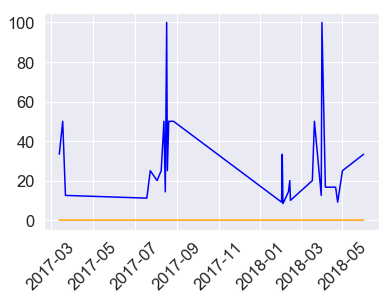

In [6]:
largest = df.nlargest(30,['Conversion_Rate2', 'CTR'])
fig1 = sns.lineplot(largest['Date'].values,largest['CTR'].values*100, color = 'orange')
fig2 = sns.lineplot(largest['Date'].values,largest['Conversion_Rate2'].values*100, color = 'blue')
plt.xticks(rotation=45)

# CTR by Channels

0.16945252167261834 1.154308817281429 0.026333325583968677


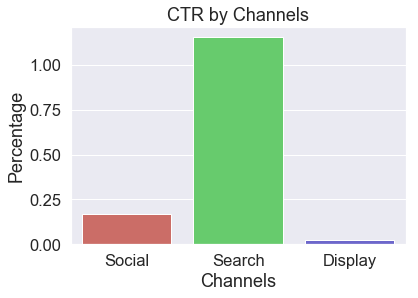

In [7]:
so = df[df['Channel'] =='Social']['CTR'].mean()*100
se = df[df['Channel'] =='Search']['CTR'].mean()*100
dis = df[df['Channel'] =='Display']['CTR'].mean()*100
print(so,se,dis)
sns.barplot(['Social', 'Search', 'Display'], [so, se, dis], palette='hls')
plt.ylabel('Percentage')
plt.xlabel('Channels')
plt.title('CTR by Channels')
plt.show()

# Conversion Rate Bar graph

0.13864944776055593 0.47176599368508865 2.2043984312391256


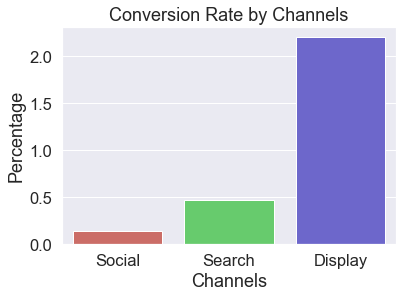

In [8]:
so_con = df[df['Channel'] =='Social']['Conversion_Rate2'].mean()*100
se_con = df[df['Channel'] =='Search']['Conversion_Rate2'].mean()*100
dis_con = df[df['Channel'] =='Display']['Conversion_Rate2'].mean()*100
print(so_con, se_con, dis_con)

sns.barplot(['Social', 'Search', 'Display'], [so_con, se_con, dis_con], palette='hls')
plt.ylabel('Percentage')
plt.xlabel('Channels')
plt.title('Conversion Rate by Channels')
plt.show()

# CPC

5.073808725579763 3.646810884631583 81.78245690408147


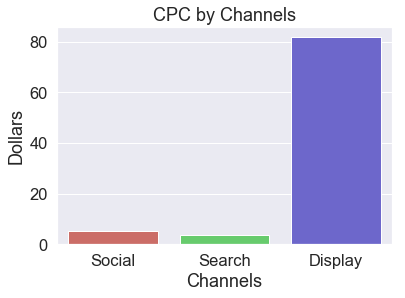

In [9]:
so_cpc = df[df['Channel'] =='Social']['CPC'].mean()
se_cpc = df[df['Channel'] =='Search']['CPC'].mean()
dis_cpc = df[df['Channel'] =='Display']['CPC'].mean()
print(so_cpc, se_cpc, dis_cpc)
sns.barplot(['Social', 'Search', 'Display'], [so_cpc, se_cpc, dis_cpc], palette='hls')
plt.ylabel('Dollars')
plt.xlabel('Channels')
plt.title('CPC by Channels')
plt.show()



# ROAS (Return on Ad Spend)

0.13962851042336064 1.0943610691771184 0.018212301635493696


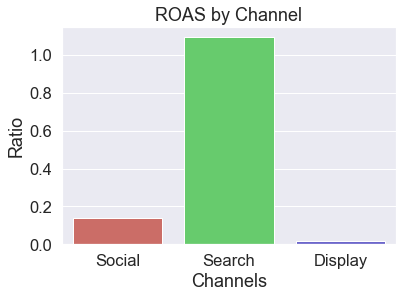

In [10]:
so_roas = df[df['Channel'] =='Social']['ROAS'].mean()
se_roas = df[df['Channel'] =='Search']['ROAS'].mean()
dis_roas = df[df['Channel'] =='Display']['ROAS'].mean()
print(so_roas, se_roas, dis_roas)
sns.barplot(['Social', 'Search', 'Display'], [so_roas, se_roas, dis_roas], palette='hls')
plt.ylabel('Ratio')
plt.xlabel('Channels')
plt.title('ROAS by Channel')
plt.show()


# Total Number of Clicks

1646851 1480109 205768


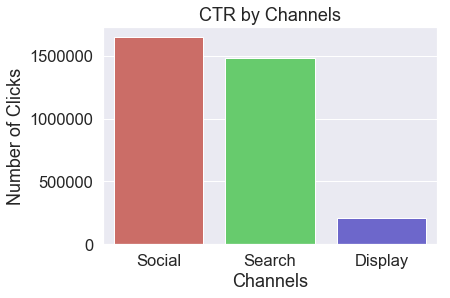

In [11]:
so_clicks = df[df['Channel'] =='Social']['Clicks'].sum()
se_clicks = df[df['Channel'] =='Search']['Clicks'].sum()
dis_clicks = df[df['Channel'] =='Display']['Clicks'].sum()
print(so_clicks,se_clicks , dis_clicks)
sns.barplot(['Social', 'Search', 'Display'], [so_clicks, se_clicks, dis_clicks], palette='hls')
plt.ylabel('Number of Clicks')
plt.xlabel('Channels')
plt.title('CTR by Channels')
plt.show()

# Profit

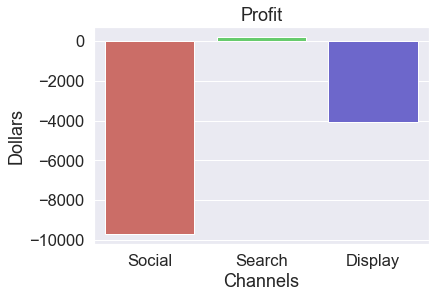

In [12]:
so_pro = df[df['Channel'] =='Social']['Profit'].mean()
se_pro = df[df['Channel'] =='Search']['Profit'].mean()
dis_pro = df[df['Channel'] =='Display']['Profit'].mean()

sns.barplot(['Social', 'Search', 'Display'], [so_pro, se_pro, dis_pro], palette='hls')
plt.ylabel('Dollars')
plt.xlabel('Channels')
plt.title('Profit')
plt.show()

# CPP

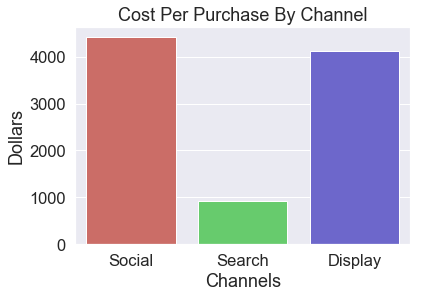

In [13]:
so_cpp = df[df['Channel'] =='Social']['CPP'].mean()
se_cpp = df[df['Channel'] =='Search']['CPP'].mean()
dis_cpp = df[df['Channel'] =='Display']['CPP'].mean()

sns.barplot(['Social', 'Search', 'Display'], [so_cpp, se_cpp, dis_cpp], palette='hls')
plt.ylabel('Dollars')
plt.xlabel('Channels')
plt.title('Cost Per Purchase By Channel')
plt.show()

# Revenue

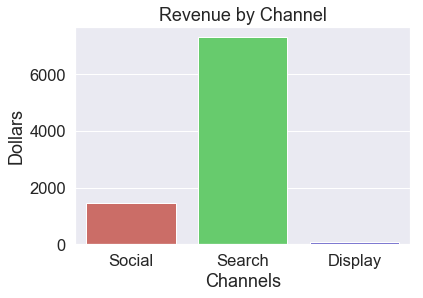

In [14]:
so_rev = df[df['Channel'] =='Social']['Revenue'].mean()
se_rev = df[df['Channel'] =='Search']['Revenue'].mean()
dis_rev = df[df['Channel'] =='Display']['Revenue'].mean()

sns.barplot(['Social', 'Search', 'Display'], [so_rev, se_rev, dis_rev], palette='hls')
plt.ylabel('Dollars')
plt.xlabel('Channels')
plt.title('Revenue by Channel')
plt.show()

# Subset by Channel

In [15]:
social = df[df['Channel'] =='Social']
search = df[df['Channel'] =='Search']
display = df[df['Channel'] =='Display']


# Identfiying traffic by time


# Day of Week

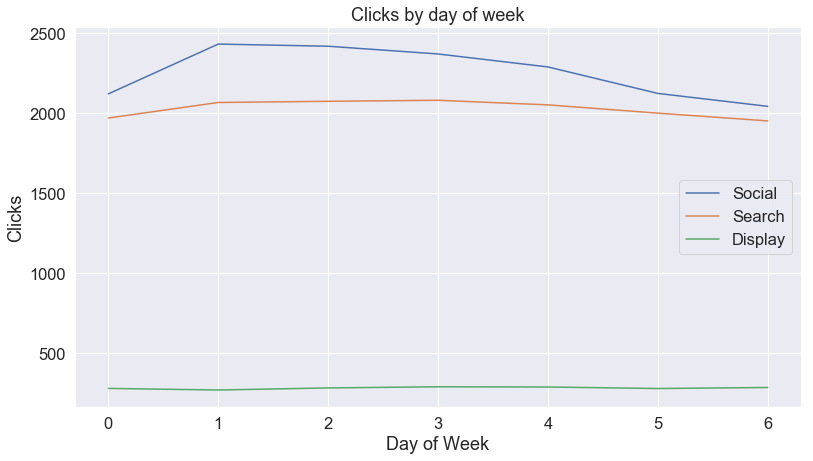

In [16]:
palette = dict(zip([1,2], sns.color_palette("nipy_spectral_r", 4)))

social_dow = social.groupby('Day_of_week').mean()['Clicks'].values
search_dow = search.groupby('Day_of_week').mean()['Clicks'].values
display_dow = display.groupby('Day_of_week').mean()['Clicks'].values
#dow = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dow = [0,1,2,3,4,5,6]
fig, (ax1)= plt.subplots(1,1,figsize=(13, 7))
ax1 = sns.lineplot(dow, social_dow, palette = palette,ax=ax1, label = "Social")
ax1 = sns.lineplot(dow, search_dow, palette = palette,ax=ax1, label = "Search")
ax1 = sns.lineplot(dow, display_dow, palette = palette,ax=ax1, label = "Display")

ax1.set(ylabel = 'Clicks', xlabel = 'Day of Week')
ax1.set_title('Clicks by day of week')
#ax1.set_xlim('2017-01','2019-01')
leg =ax1.legend()


In [17]:
social.groupby('Month').mean()['Clicks']

Month
1      991.500000
2      959.000000
3     1833.016129
4     1811.400000
5     1868.612903
6     2540.183333
7     2646.693548
8     2503.354839
9     2692.550000
10    3311.467742
11    3476.466667
12    2360.048387
Name: Clicks, dtype: float64

# Month

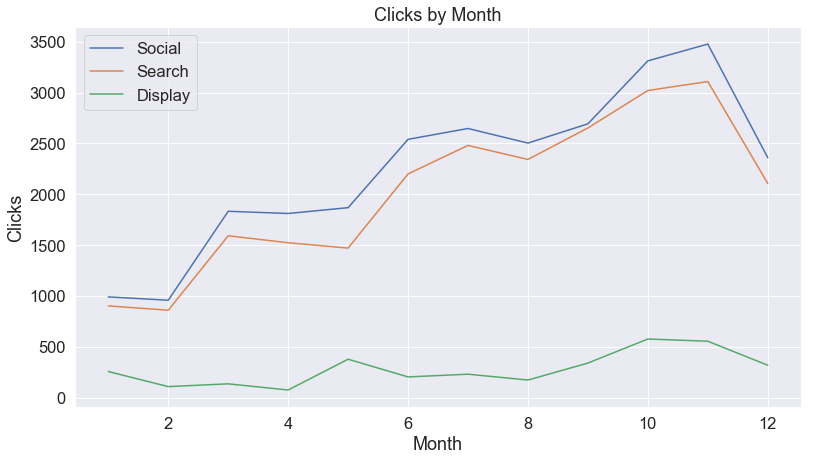

In [18]:
palette = dict(zip([1,2], sns.color_palette("nipy_spectral_r", 4)))

social_month = social.groupby('Month').mean()['Clicks'].values
search_month = search.groupby('Month').mean()['Clicks'].values
display_month = display.groupby('Month').mean()['Clicks'].values
month = [1,2,3,4,5,6,7, 8,9,10,11,12]
#dow = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, (ax1)= plt.subplots(1,1,figsize=(13, 7))
ax1 = sns.lineplot(month, social_month, palette = palette,ax=ax1, label = "Social")
ax1 = sns.lineplot(month, search_month, palette = palette,ax=ax1, label = "Search")
ax1 = sns.lineplot(month, display_month, palette = palette,ax=ax1, label = "Display")

ax1.set(ylabel = 'Clicks', xlabel = 'Month')

ax1.set_title('Clicks by Month')

#ax1.set_xlim('January','')
leg =ax1.legend()


# Overall Impressions and Clicks

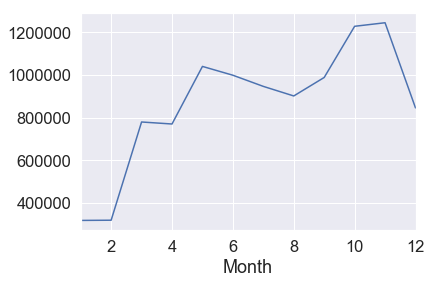

In [19]:
df.groupby('Month').mean()['Impressions'].plot()


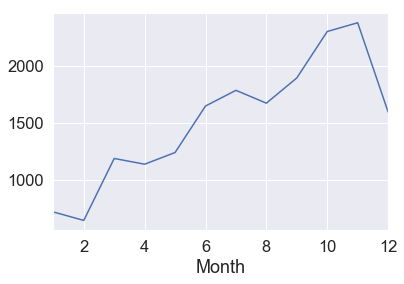

In [20]:
df.groupby('Month').mean()['Clicks'].plot()

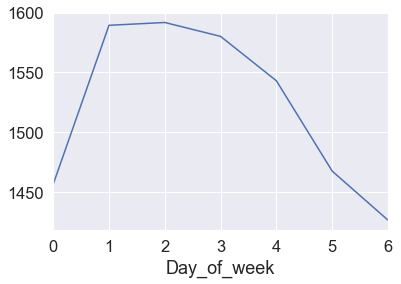

In [21]:
df.groupby('Day_of_week').mean()['Clicks'].plot()

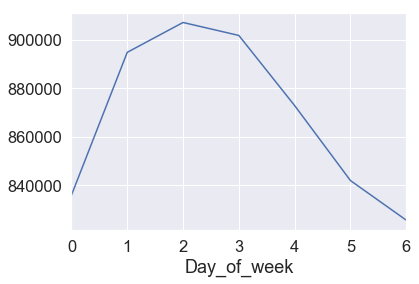

In [22]:
df.groupby('Day_of_week').mean()['Impressions'].plot()

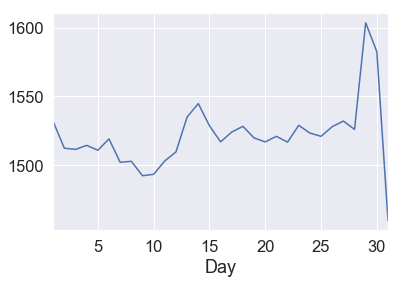

In [23]:
df.groupby('Day').mean()['Clicks'].plot()

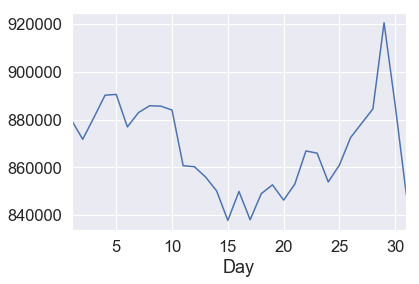

In [24]:
df.groupby('Day').mean()['Impressions'].plot()

# Day of Month

In [25]:

social_dom = social.groupby('Day').mean()['Clicks'].values
search_dom = search.groupby('Day').mean()['Clicks'].values
display_dom = display.groupby('Day').mean()['Clicks'].values

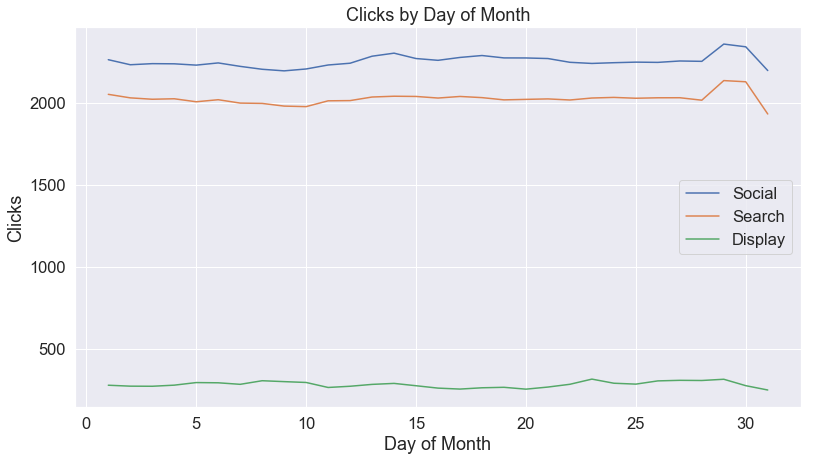

In [26]:
palette = dict(zip([1,2], sns.color_palette("nipy_spectral_r", 4)))

social_dom = social.groupby('Day').mean()['Clicks'].values
search_dom = search.groupby('Day').mean()['Clicks'].values
display_dom = display.groupby('Day').mean()['Clicks'].values
dom = np.arange(1,32)
#dow = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, (ax1)= plt.subplots(1,1,figsize=(13, 7))
ax1 = sns.lineplot(dom, social_dom, palette = palette,ax=ax1, label = "Social")
ax1 = sns.lineplot(dom, search_dom, palette = palette,ax=ax1, label = "Search")
ax1 = sns.lineplot(dom, display_dom, palette = palette,ax=ax1, label = "Display")

ax1.set(ylabel = 'Clicks', xlabel = 'Day of Month')

ax1.set_title('Clicks by Day of Month')

#ax1.set_xlim('January','')
leg =ax1.legend()

# Scale data with `MinMaxScaler sklearn`

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(social['Conversion_Rate2'].values.reshape(-1,1))
a= scaler.transform(social['Conversion_Rate2'].values.reshape(-1,1))
transformed_val_cr_social = []
for i in a.tolist():
    transformed_val_cr_social.append(i[0])

scaler = MinMaxScaler()
scaler.fit(social['CTR'].values.reshape(-1,1))
b= scaler.transform(social['CTR'].values.reshape(-1,1))
transformed_val_ctr_social = []
for i in b.tolist():
    transformed_val_ctr_social.append(i[0])
    

scaler = MinMaxScaler()
scaler.fit(search['CTR'].values.reshape(-1,1))
c= scaler.transform(search['CTR'].values.reshape(-1,1))
transformed_val_ctr_search = []
for i in c.tolist():
    transformed_val_ctr_search.append(i[0])

scaler = MinMaxScaler()
scaler.fit(search['Conversion_Rate2'].values.reshape(-1,1))
d= scaler.transform(search['Conversion_Rate2'].values.reshape(-1,1))
transformed_val_cr_search = []
for i in d.tolist():
    transformed_val_cr_search.append(i[0])
    
scaler = MinMaxScaler()
scaler.fit(display['CTR'].values.reshape(-1,1))
e= scaler.transform(display['CTR'].values.reshape(-1,1))
transformed_val_ctr_display = []
for i in e.tolist():
    transformed_val_ctr_display.append(i[0])

scaler = MinMaxScaler()
scaler.fit(display['Conversion_Rate2'].values.reshape(-1,1))
f= scaler.transform(display['Conversion_Rate2'].values.reshape(-1,1))
transformed_val_cr_display = []
for i in f.tolist():
    transformed_val_cr_display.append(i[0])
    


In [28]:
print(np.sum(transformed_val_ctr_display), np.sum(transformed_val_ctr_search), np.sum(transformed_val_ctr_social))

164.84711743289762 263.0442020434159 263.0110699287621


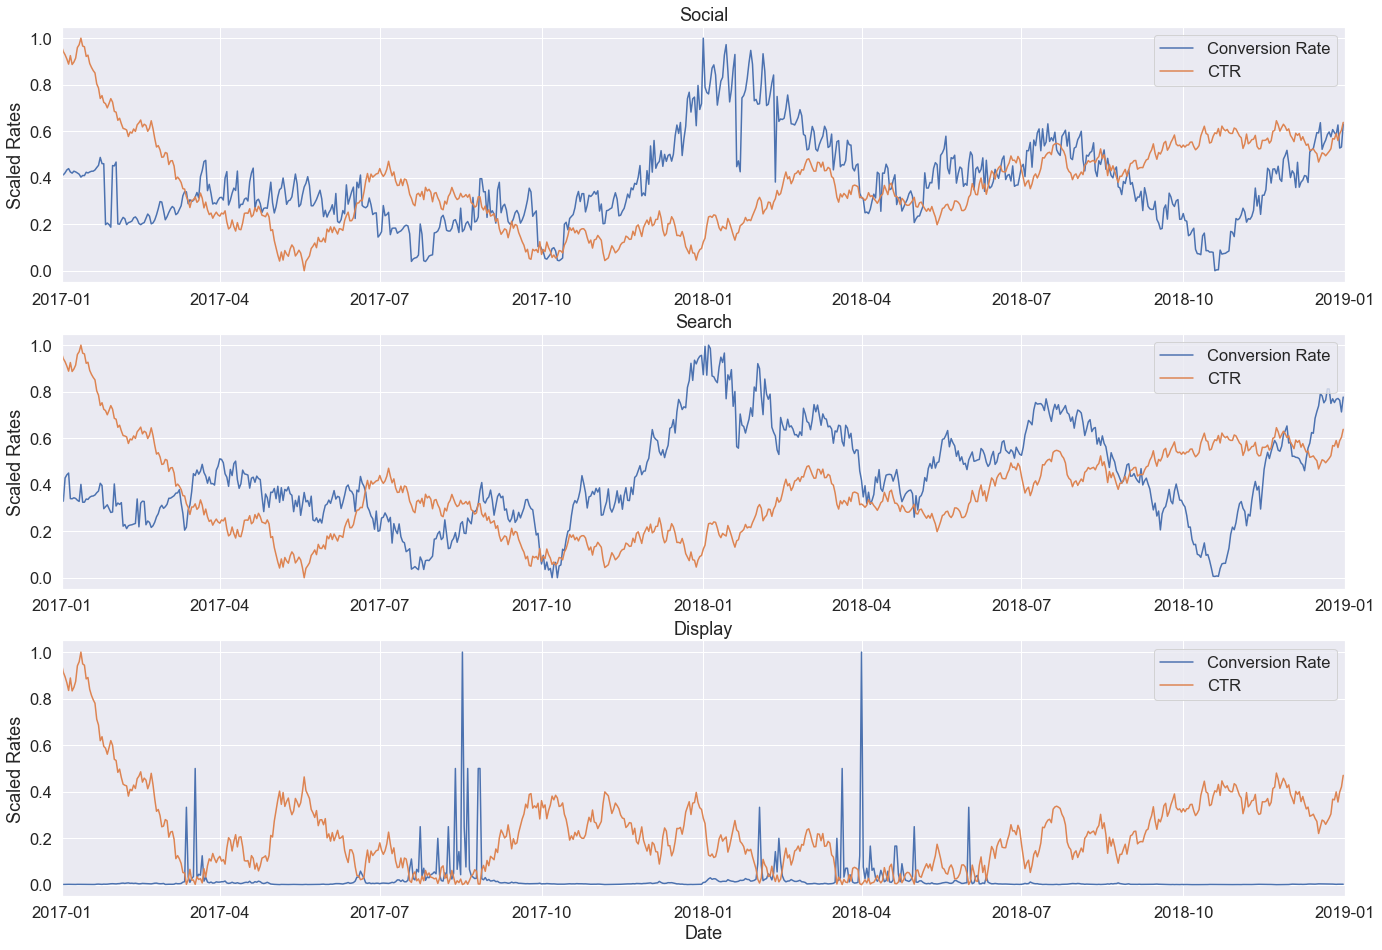

In [29]:
palette = dict(zip([1,2], sns.color_palette("nipy_spectral_r", 4)))
fig, (ax1,ax2, ax3)= plt.subplots(3,1,figsize=(23, 16))
ax1 = sns.lineplot(social['Date'].values ,transformed_val_cr_social, palette = palette,ax=ax1, label = "Conversion Rate")
ax1 = sns.lineplot(social['Date'].values, transformed_val_ctr_social, palette = palette,ax=ax1, label = "CTR")
ax1.set(ylabel = 'Scaled Rates')
ax1.set_title('Social')
ax1.set_xlim('2017-01','2019-01')
leg =ax1.legend()

ax2 = sns.lineplot(search['Date'].values, transformed_val_cr_search, palette = palette,ax=ax2, label = "Conversion Rate")
ax2 = sns.lineplot(search['Date'].values, transformed_val_ctr_search, palette = palette,ax=ax2, label = "CTR")
ax2.set(ylabel = 'Scaled Rates')
ax2.set_title('Search')
ax2.set_xlim('2017-01','2019-01')
leg =ax2.legend()

ax3 = sns.lineplot(display['Date'], transformed_val_cr_display, palette = palette,ax=ax3, label = "Conversion Rate")
ax3 = sns.lineplot(display['Date'], transformed_val_ctr_display, palette = palette,ax=ax3, label = "CTR")
ax3.set(ylabel = 'Scaled Rates')
ax3.set_title('Display')
ax3.set_xlim('2017-01','2019-01')
leg =ax3.legend()

#fig.tight_layout()
plt.show()

# Subset to isolate spikes
* Only 15 records that have conversion rate > 0.2 after scaling! 


In [32]:
display = display.reset_index(drop=True)
scaled_cr_display = pd.DataFrame(transformed_val_cr_display)
optimal_display = display.drop(display.index[[scaled_cr_display[scaled_cr_display[0] <0.2].index]])


In [42]:
optimal_display['CPC']

71     1066.666667
76     1600.000000
204    1120.000000
220    1120.000000
224    2240.000000
228    4480.000000
229    1120.000000
231    2240.000000
237    2240.000000
238    2240.000000
397     480.000000
444    1600.000000
455    3520.000000
485    1040.000000
516    1493.333333
Name: CPC, dtype: float64

In [60]:
print('Optimal ROAS: ', optimal_display['ROAS'].mean())
print('optimal CPP: ', optimal_display['CPP'].mean())
print('optimal CPC: ', optimal_display['CPC'].mean())
print('optimal Revenue: ', optimal_display['Revenue'].mean())
print('optimal conversion rate: ', optimal_display['Conversion_Rate2'].mean()*100)
print('Optimal spend: ', optimal_display['Spend'].mean())
print('Optimal Profit: ', optimal_display['Profit'].mean())

Optimal ROAS:  0.00010523697228987256
optimal CPP:  3936.0
optimal CPC:  1840.0
optimal Revenue:  0.3367088731324846
optimal conversion rate:  46.666666666666664
Optimal spend:  3936.0
Optimal Profit:  -3935.6632911268675


In [ ]:
print('Optimal ROAS: ', optimal_display['ROAS'].mean())
print('optimal CPP: ', optimal_display['CPP'].mean())
print('optimal CPC: ', optimal_display['CPC'].mean())
print('optimal Revenue: ', optimal_display['Revenue'].mean())
print('optimal conversion rate: ', optimal_display['Conversion_Rate2'].mean()*100)
print('Optimal spend: ', optimal_display['Spend'].mean())

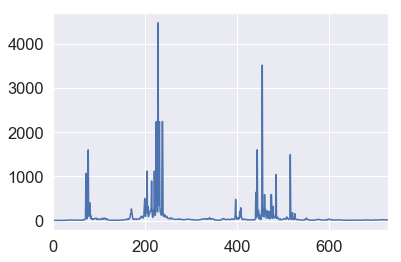

In [34]:
display['CPC'].plot()

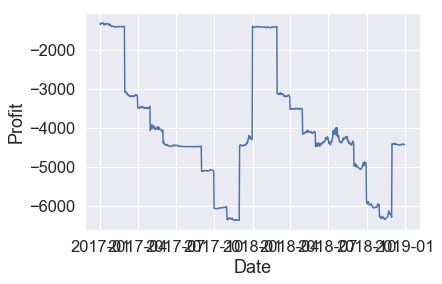

In [55]:
sns.lineplot(display['Date'], display['Profit'])

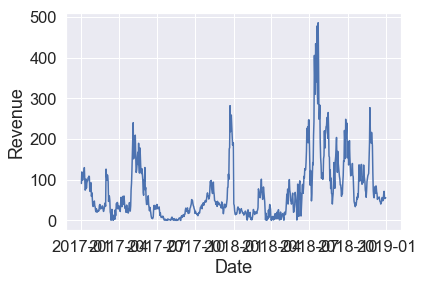

In [58]:
sns.lineplot(display['Date'], display['Revenue'])

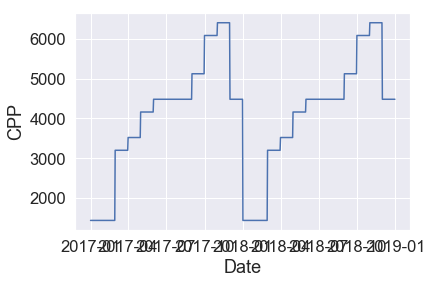

In [59]:
sns.lineplot(display['Date'], display['CPP'])

In [38]:
display['Spend'].mean()

4120.109589041096